<a href="https://colab.research.google.com/github/Reem-KR/GEOL-558_Supervised_Classification-_Project/blob/main/Storm_Data_Analysis_Supervised_Classification_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Storm Analysis**

Reem Alrowaished

January 30 2025

## Introduction:

Storms are powerful natural events that can significantly impact human life, infrastructure, and the environment. Understanding the characteristics and behavior of these storms is essential for forecasting, disaster preparedness, and risk management.

This project uses a comprehensive dataset of storms to predict the storm type (Tropical Storm or Hurricane) based on meteorological characteristics such as wind speed, pressure, and storm size (diameter). Mchine learning algorithms will be applied to classify storms accurately and distinguish between weaker tropical storms and stronger hurricanes. By analyzing these key features, the project aims to build a model that can predict storm types, improving predictive capabilities for storm intensity and enabling better preparation and response strategies.

Dataset Source: https://www.kaggle.com/datasets/utkarshx27/noaa-atlantic-hurricane-database/data

## Section 1: Overview and Data Cleaning

In [94]:
# I need to install this for the base map
!pip install cartopy

In [95]:
# Import libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [96]:
# Import the Dataset file from Github
url = "https://raw.githubusercontent.com/Reem-KR/GEOL-558_Supervised_Classification-_Project/main/storms.csv"

# Read the CSV file from GitHub and create a dataframe
original_data = pd.read_csv(url)

# Show the first 5 rows
original_data.head(5)

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN


In [97]:
# Check the number of rows and columns of the dataframe
rows, columns = original_data.shape

# Print the number of rows and columns
print(f'The number of rows is: {rows}')
print(f'The number of columns is: {columns}')

The number of rows is: 19066
The number of columns is: 14


In [98]:
# Information of the dataset
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19066 non-null  int64  
 1   name                          19066 non-null  object 
 2   year                          19066 non-null  int64  
 3   month                         19066 non-null  int64  
 4   day                           19066 non-null  int64  
 5   hour                          19066 non-null  int64  
 6   lat                           19066 non-null  float64
 7   long                          19066 non-null  float64
 8   status                        19066 non-null  object 
 9   category                      4684 non-null   float64
 10  wind                          19066 non-null  int64  
 11  pressure                      19066 non-null  int64  
 12  tropicalstorm_force_diameter  9554 non-null   float64
 13  h

The code above provides a summary of the dataset in terms of its structure and the types of data it contains.

I noticed that there is a duplicate in the index as the data has an index, and Python also added an index. So, I need to delete the dataset's original index and keep Python's.

In [99]:
# Removing the extra index column
clean_data=original_data.copy()
clean_data=clean_data.drop(columns= ['Unnamed: 0'])

In [100]:
# Display it to QC
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          19066 non-null  object 
 1   year                          19066 non-null  int64  
 2   month                         19066 non-null  int64  
 3   day                           19066 non-null  int64  
 4   hour                          19066 non-null  int64  
 5   lat                           19066 non-null  float64
 6   long                          19066 non-null  float64
 7   status                        19066 non-null  object 
 8   category                      4684 non-null   float64
 9   wind                          19066 non-null  int64  
 10  pressure                      19066 non-null  int64  
 11  tropicalstorm_force_diameter  9554 non-null   float64
 12  hurricane_force_diameter      9554 non-null   float64
dtypes

Now, the dataset has no extra unnecessary columns.

In [101]:
# Check for missing data in the entire dataset
missing_data = clean_data.isnull().sum()
missing_data

,0
name,0
year,0
month,0
day,0
hour,0
lat,0
long,0
status,0
category,14382
wind,0


From the code above, I can see that the important columns such as, tropicalstorm_force_diameter	and
hurricane_force_diameter, has some missing values in the dataset which I need to delete.

In [102]:
# Deleting important rows with missing data
clean_data=clean_data.dropna(subset=['tropicalstorm_force_diameter', 'hurricane_force_diameter'])

# QC missing data
missing_data = clean_data.isnull().sum()
missing_data

,0
name,0
year,0
month,0
day,0
hour,0
lat,0
long,0
status,0
category,7503
wind,0


Now, the data is cleaned with no missing values in the important columns.

In [103]:
# Understanding the dataset
clean_data.describe()

,year,month,day,hour,lat,long,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
count,9554.000000,9554.000000,9554.000000,9554.000000,9554.000000,9554.000000,2051.000000,9554.000000,9554.000000,9554.000000,9554.000000
mean,2012.717919,8.611367,15.610844,9.054741,26.884195,-60.537147,2.010726,49.192485,993.426418,146.309399,14.811074
std,5.493054,1.476215,8.780236,6.726712,10.598707,21.458958,1.209266,25.288444,19.211105,156.006026,34.083358
min,2004.000000,1.000000,1.000000,0.000000,7.000000,-106.700000,1.000000,10.000000,882.000000,0.000000,0.000000
25%,2008.000000,8.000000,8.000000,4.000000,18.100000,-78.300000,1.000000,30.000000,987.000000,0.000000,0.000000
50%,2012.000000,9.000000,16.000000,12.000000,26.250000,-61.800000,2.000000,40.000000,1000.000000,110.000000,0.000000
75%,2018.000000,9.000000,23.000000,16.000000,33.700000,-43.700000,3.000000,60.000000,1007.000000,220.000000,0.000000
max,2021.000000,12.000000,31.000000,23.000000,69.000000,13.500000,5.000000,160.000000,1021.000000,1440.000000,300.000000


The above function was used to compute summary statistics, such as the mean, standard deviation, minimum, and maximum values for the numerical columns in the dataset. This step is fundamental to understand the data's central tendency and spread.

In [104]:
# Show the first 5 rows of the clean dataset
clean_data.head(5)

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
9432,Alex,2004,7,31,18,30.3,-78.3,tropical depression,NaN,25,1010,0.0,0.0
9433,Alex,2004,8,1,0,31.0,-78.8,tropical depression,NaN,25,1009,0.0,0.0
9434,Alex,2004,8,1,6,31.5,-79.0,tropical depression,NaN,25,1009,0.0,0.0
9435,Alex,2004,8,1,12,31.6,-79.1,tropical depression,NaN,30,1009,0.0,0.0
9436,Alex,2004,8,1,18,31.6,-79.2,tropical storm,NaN,35,1009,50.0,0.0


In [105]:
# Check the number of rows and columns of the clean data
rows, columns = clean_data.shape

# Print the number of rows and columns
print(f'The number of rows is: {rows}')
print(f'The number of columns is: {columns}')

The number of rows is: 9554
The number of columns is: 13


## Section 2: Visualization

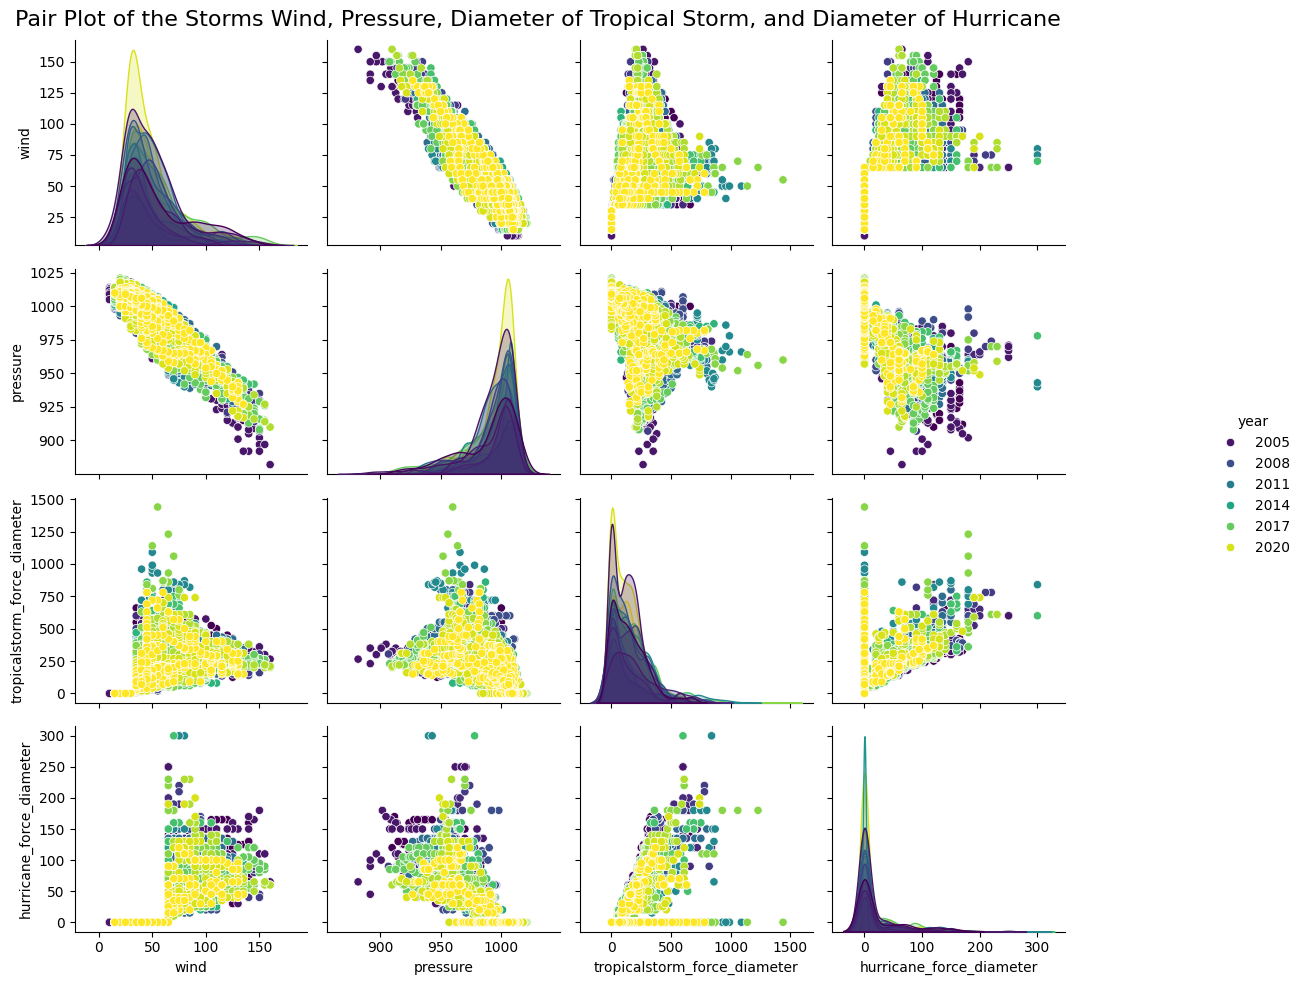

In [106]:
# Figure 1:

# Create a pair plot for selected columns to show the relationship between the Storm's wind, pressure, diameter of tropical storm, and diameter of hurricane
grid = sns.pairplot(
    clean_data,
    vars=['wind', 'pressure', 'tropicalstorm_force_diameter', 'hurricane_force_diameter'],   # Data columns to include
    hue='year',              # Color by the year
    palette='viridis'        # Specify color palette
)

# Add a title
plt.suptitle('Pair Plot of the Storms Wind, Pressure, Diameter of Tropical Storm, and Diameter of Hurricane', fontsize=16)


# Manually control the legend's position to move it more to the right
grid._legend.set_bbox_to_anchor((1.2, 0.5))

# Show the plot
plt.tight_layout()
plt.show()


**Figure 1:**

The pair plot visualizes the relationships between key variables in the dataset, specifically: Wind speed, Pressure, Tropical storm force diameter, and Hurricane force diameter. Also, the points in the plot are colored based on the year of the storm, so each color represents storms from different years.

The diagonal plots are density plots showing the distribution of each individual variable (wind, pressure, tropical storm force diameter, and hurricane force diameter) and show how frequently each variable takes on different values.

The off-diagonal elements are scatter plots showing the relationships between pairs of variables. As such, I can see that:

Wind vs. Pressure: Shows how wind speed correlates with pressure. It shows that lower pressure is associated with stronger storms (higher wind speed).

Wind vs. Tropical Storm Force Diameter: Shows the relationship between the wind speed and the diameter of tropical storms. This relationship can give insights into how the size of a storm is related to its wind speed.

Pressure vs. Tropical Storm Force Diameter: Shows how pressure varies with the diameter of tropical storms.

Tropical Storm Force Diameter vs. Hurricane Force Diameter: Shows how the size of a tropical storm compares with the size of a hurricane.

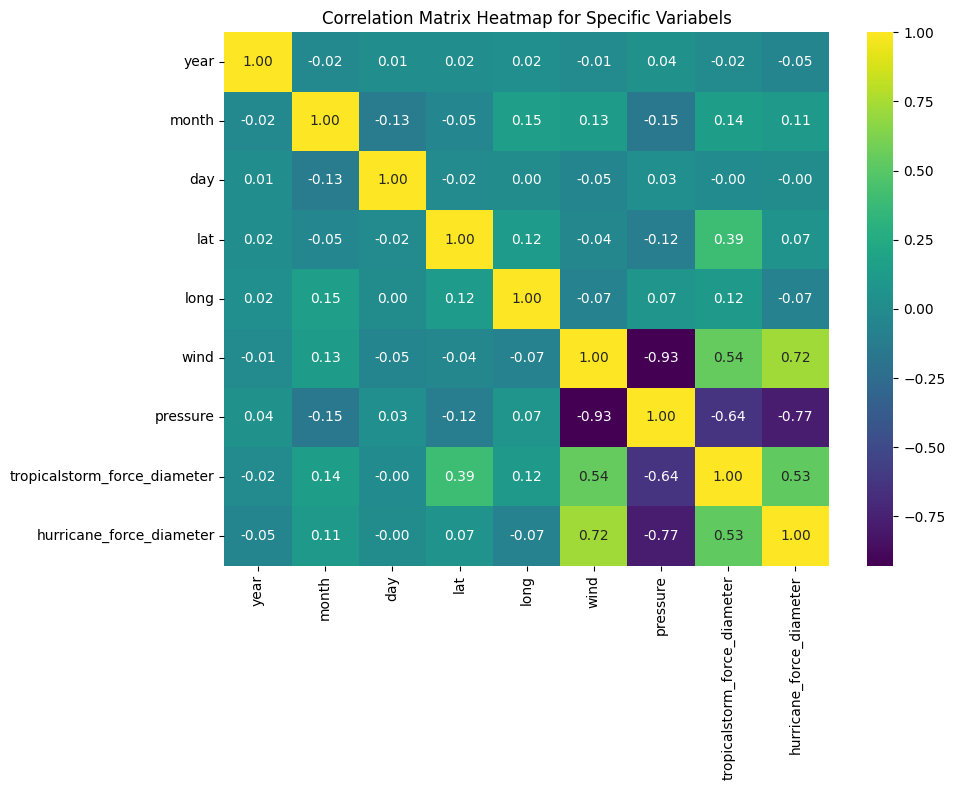

In [107]:
# Figure 2:

# Compute the correlation matrix
correlation_matrix = clean_data[['year', 'month', 'day','lat', 'long','wind', 'pressure', 'tropicalstorm_force_diameter', 'hurricane_force_diameter']].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', cbar=True)

# Add a title
plt.title('Correlation Matrix Heatmap for Specific Variabels')

# Show the plot
plt.tight_layout()
plt.show()


**Figure 2:**

The plot shows the correlation matrix heatmap, which visualizes the strength and direction of relationships between different selected variables in my dataset. I can see that there is a:

1- Strong positive correlations between: Wind and Hurricane Force Diameter (0.72), Wind and Tropical Storm Force Diameter (0.54), and Tropical Storm Force Diameter and Hurricane Force Diameter (0.53).

2- Strong negative correlations between: Wind and Pressure (-0.93), Pressure and Tropical Storm Force Diameter (-0.64), and Pressure and Hurricane Force Diameter (-0.77).


3- Weak correlations between: Year and other variables (wind, pressure, and both force diameters), and Latitude and Longitude with most variables, indicating minimal geographic influence on storm characteristics.

Overall:

- There are strong positive correlations between wind and both diameters (hurricane and tropical storm).
- Wind and pressure have a strong negative correlation, as expected.
- Tropical Storm Force Diameter and Hurricane Force Diameter are moderately positively correlated, which makes sense since larger tropical storms tend to have larger hurricane diameters.
- Most of the relationships involving year, latitude, and longitude are weak, indicating little time-based or geographical influence on storm characteristics.

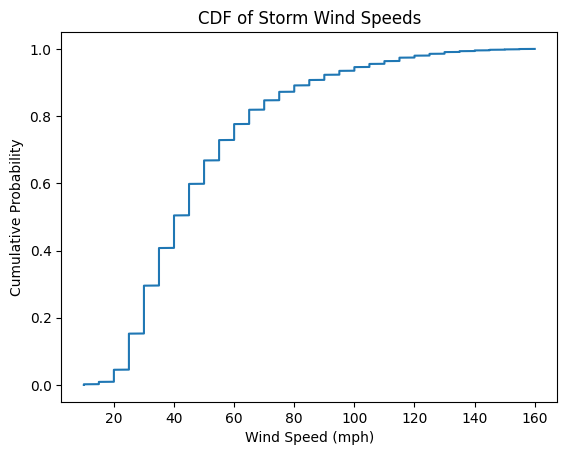

In [108]:
# Figure 3:

# Select the column from the dataset
data = clean_data['wind']

# Sort the data
sorted_data = np.sort(data)

# Calculate the CDF
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the CDF
plt.plot(sorted_data, cdf)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Storm Wind Speeds')
plt.show()


**Figure 3:**

The plot above is a Cumulative Distribution Function (CDF) of storm wind speeds, showing the cumulative probability of wind speeds up to a given value. The X-axis represents wind speed (in mph), and the Y-axis shows the cumulative probability. The plot reveals that most storms in the dataset have lower wind speeds, with a steep increase at lower values. As wind speed increases, the cumulative probability gradually approaches 1, indicating that fewer storms have extreme wind speeds. This suggests that stronger storms with very high wind speeds(greater than 150 mph) are relatively rare compared to weaker storms.

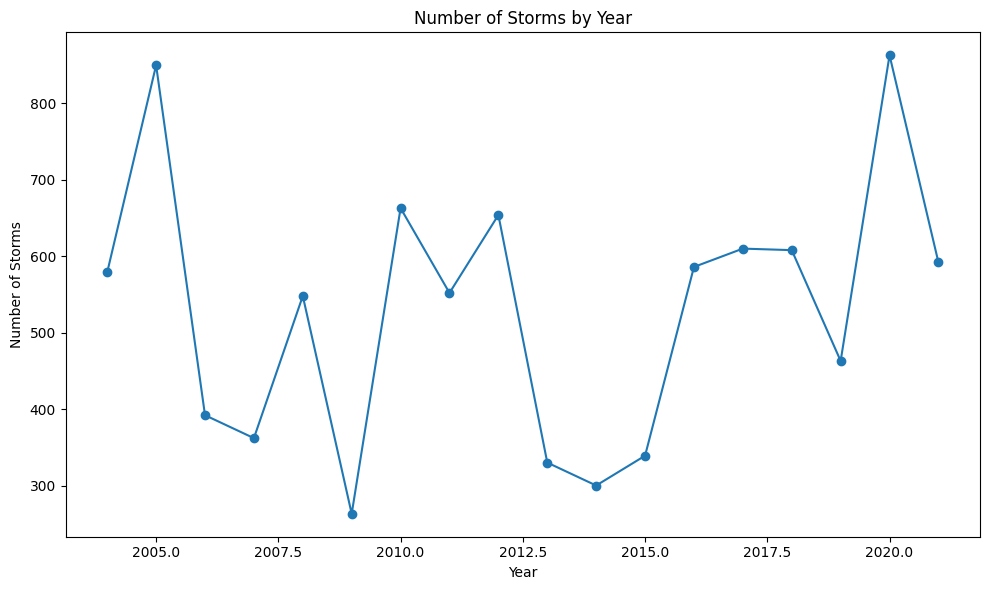

In [109]:
# Figure 4:

# Count the number of storms per year
storms_per_year = clean_data.groupby('year').size()

# Plot the time series
plt.figure(figsize=(10, 6))
storms_per_year.plot(kind='line', marker='o')


# Add title and labels
plt.title('Number of Storms by Year')
plt.xlabel('Year')
plt.ylabel('Number of Storms')

# Show the plot
plt.tight_layout()
plt.show()

**Figure 4:**

This plot illustrates the number of storms recorded each year, showing significant fluctuations in the storm's frequency over time. For example, I can see that years like 2005 and 2020 experienced very high numbers of storms, while there is a noticeable dip in storm occurrences between 2007 and 2011, and also in 2013, indicating a period of lower storm activity. Overall, the data does not show a consistent upward or downward trend, suggesting that storm frequency varies considerably from year to year. This variability could be influenced by a range of factors, including environmental conditions, climate change, and data collection practices.

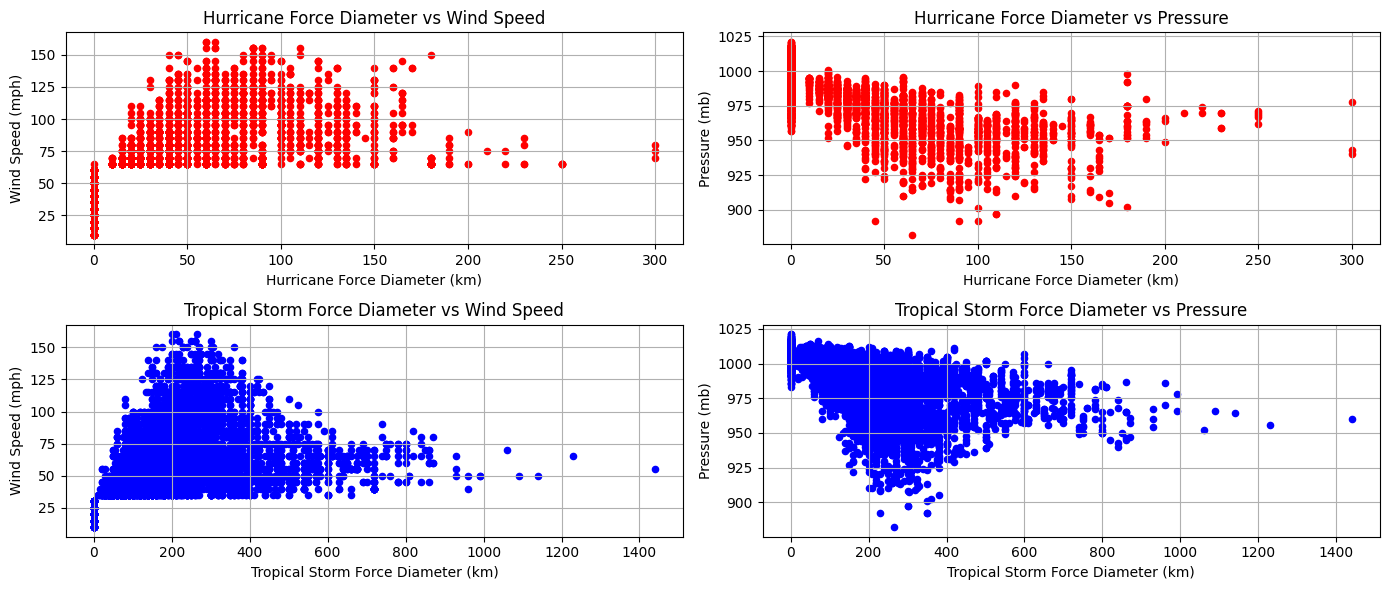

In [110]:
# Figure 5:

# Four subplots comparing Hurricane Force Diameter and Tropical Storm Force Diameter against Wind and Pressure

# Create a figure for the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

# Scatter Plot 1: Hurricane Force Diameter vs Wind
clean_data.plot.scatter(x='hurricane_force_diameter', y='wind', ax=axes[0,0], color='red')
axes[0,0].set_title('Hurricane Force Diameter vs Wind Speed')
axes[0,0].set_xlabel('Hurricane Force Diameter (km)')
axes[0,0].set_ylabel('Wind Speed (mph)')
axes[0,0].grid(True)

# Scatter Plot 2: Hurricane Force Diameter vs Pressure
clean_data.plot.scatter(x='hurricane_force_diameter', y='pressure', ax=axes[0,1], color='red')
axes[0,1].set_title('Hurricane Force Diameter vs Pressure')
axes[0,1].set_xlabel('Hurricane Force Diameter (km)')
axes[0,1].set_ylabel('Pressure (mb)')
axes[0,1].grid(True)

# Scatter Plot 3: Hurricane Force Diameter vs Wind
clean_data.plot.scatter(x='tropicalstorm_force_diameter', y='wind', ax=axes[1,0], color='blue')
axes[1,0].set_title('Tropical Storm Force Diameter vs Wind Speed')
axes[1,0].set_xlabel('Tropical Storm Force Diameter (km)')
axes[1,0].set_ylabel('Wind Speed (mph)')
axes[1,0].grid(True)


# Scatter Plot 4: Hurricane Force Diameter vs Pressure
clean_data.plot.scatter(x='tropicalstorm_force_diameter', y='pressure', ax=axes[1,1], color='blue')
axes[1,1].set_title('Tropical Storm Force Diameter vs Pressure')
axes[1,1].set_xlabel('Tropical Storm Force Diameter (km)')
axes[1,1].set_ylabel('Pressure (mb)')
axes[1,1].grid(True)

# Show plots
plt.tight_layout()
plt.show()

**Figure 5:**

The scatter plot above is a matrix showing the relationships between different pairs of storm characteristics, specifically: Hurricane Force Diameter vs Wind Speed, Hurricane Force Diameter vs Pressure, Tropical Storm Force Diameter vs Wind Speed, and Tropical Storm Force Diameter vs Pressure.

1- The Hurricane Force Diameter vs Wind Speed plot shows that wind speeds for hurricane-force storms generally range from about 60 mph to 150 mph. There is a moderate positive correlation between the diameter and wind speed, as larger hurricanes tend to have higher wind speeds.

2- The Hurricane Force Diameter vs Pressure plot shows an inverse relationship, as the hurricane force diameter increases, the pressure generally decreases, which is typical for stronger storms. Larger hurricanes tend to have lower pressures.

3- The Tropical Storm Force Diameter vs Wind Speed plot shows that wind speeds for tropical storm-force storms mostly range from 40 mph to 125 mph. There is a strong positive correlation between the diameter and wind speed, with larger tropical storms generally having stronger winds.

4- The Tropical Storm Force Diameter vs Pressure shows a similar to the hurricane plot, there is an inverse relationship between diameter and pressure. Larger tropical storms tend to have lower pressures.


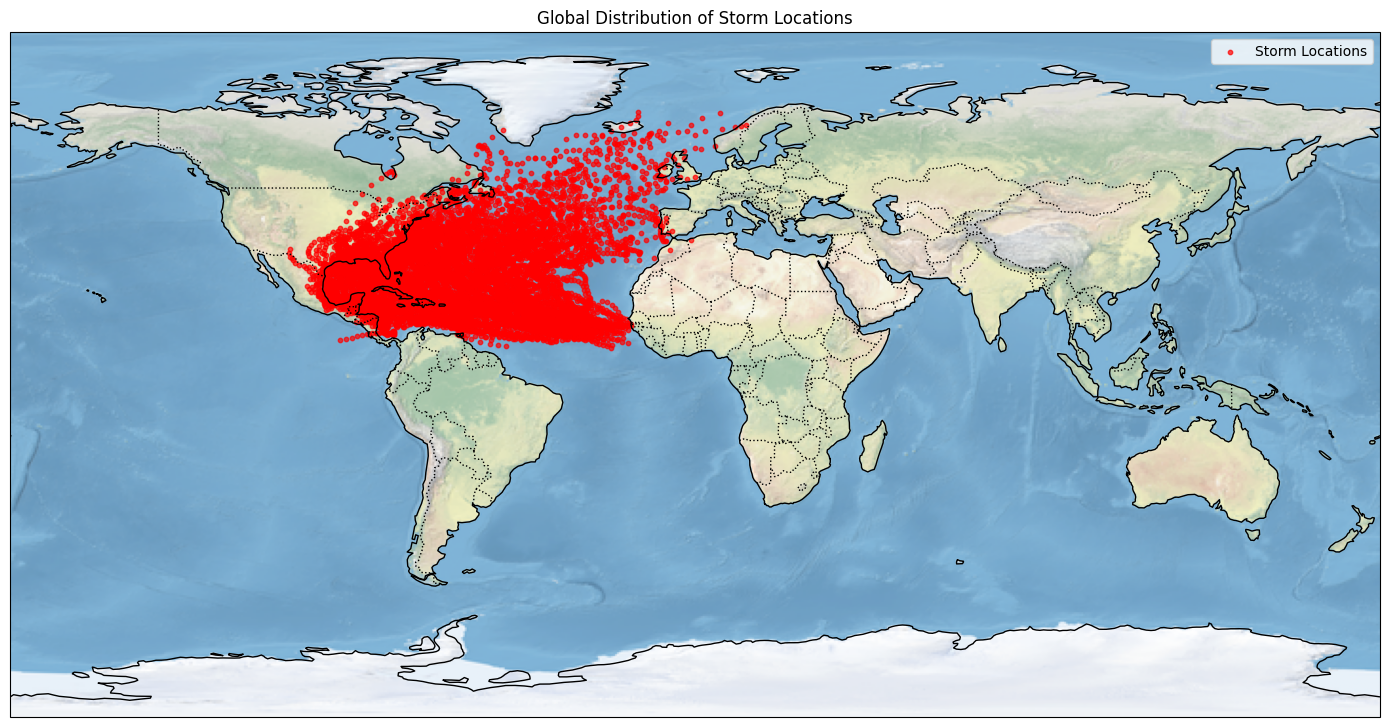

In [111]:
# Figure 6:

# Create a figure with a global projection
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add a background image of the Earth and map features
ax.stock_img()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# Scatter Plot for Storm Locations (Latitude and Longitude)
plt.scatter(clean_data['long'], clean_data['lat'], color='red', s=10, transform=ccrs.PlateCarree(), alpha=0.7, label='Storm Locations')

# Add title and legend
plt.title('Global Distribution of Storm Locations')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Ignore the warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='cartopy')

**Figure 6:**

The map shows the global distribution of storm locations. The red dots represent the geographic locations where storms have occurred, plotted by their latitude and longitude coordinates. I can see a high concentration of storms located in the Atlantic Ocean, particularly around the Caribbean and the Gulf of Mexico, indicating that many storms occur in these areas, which are prone to hurricanes and tropical storms. The distribution shows how storms tend to follow certain paths, primarily affecting coastal and oceanic regions. This visualization helps identify storm-prone areas, offering valuable insights for risk assessment, disaster preparedness, and climate studies.